In [70]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


/home/camille/miniconda/envs/libboink/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'indices', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [71]:
import ast
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm

from ficus import FigureManager
from IPython.display import FileLink

import yaml

In [72]:
with open('config.yaml') as fp:
    info = yaml.load(fp)

In [73]:
sns.set(style="ticks")

In [98]:
def plot_component_size_samples(filename, interval=1000000, ax=None, ascending=False, legend=legend, logy=False):
    import ast

    # do subsampling without evaluating component samples --
    # for large files, evaluating every sample could take a very long time
    times = pd.read_csv(filename, usecols=['read_n'])
    if interval is None:
        n_timepoints = len(times)
        if n_timepoints < 20:
            subsamples = times.read_n
        else:
            idx = np.round(np.linspace(0, n_timepoints - 1, 20)).astype(int)
            subsamples = times.loc[idx].read_n
    elif interval is False:
        subsamples = np.array(times.read_n)
    else:
        subsamples = np.array([ t for t in times.read_n if int(t) % interval == 0 ])
    indices = times.loc[times.read_n.isin(subsamples)].index

    data = pd.read_csv(filename,
                       header=0,
                       skiprows=lambda idx: idx not in indices,
                       converters={'component_size_sample': lambda col: ast.literal_eval(col)})
    data = data[:-1]
    samples = pd.DataFrame.from_dict(dict(zip(data.read_n, data.component_size_sample.values)))
    
    def _plot(ax):
        _samples = samples.apply(lambda x: x.sort_values(ascending=ascending).values)
        cums = _samples.cumsum()
        sums = _samples.sum()
        (cums / sums).plot(ax=ax, colormap = cm.autumn_r, legend=legend, logy=logy)
        #ax.set_title('Cumulative Component Size Proportion')   
    
    if ax is not None:
        _plot(ax)
        return samples, (ax.get_figure(), ax)
    else:
        with FigureManager('{0}/component_sizes_cumsum.png'.format(directory),
                           figsize=(12,12),
                           show=True) as (fig, ax):
            _plot(ax)
            return samples, (ax.get_figure(), ax)

/home/camille/miniconda/envs/libboink/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


Compute not finished yet or Error.
Compute not finished yet or Error.


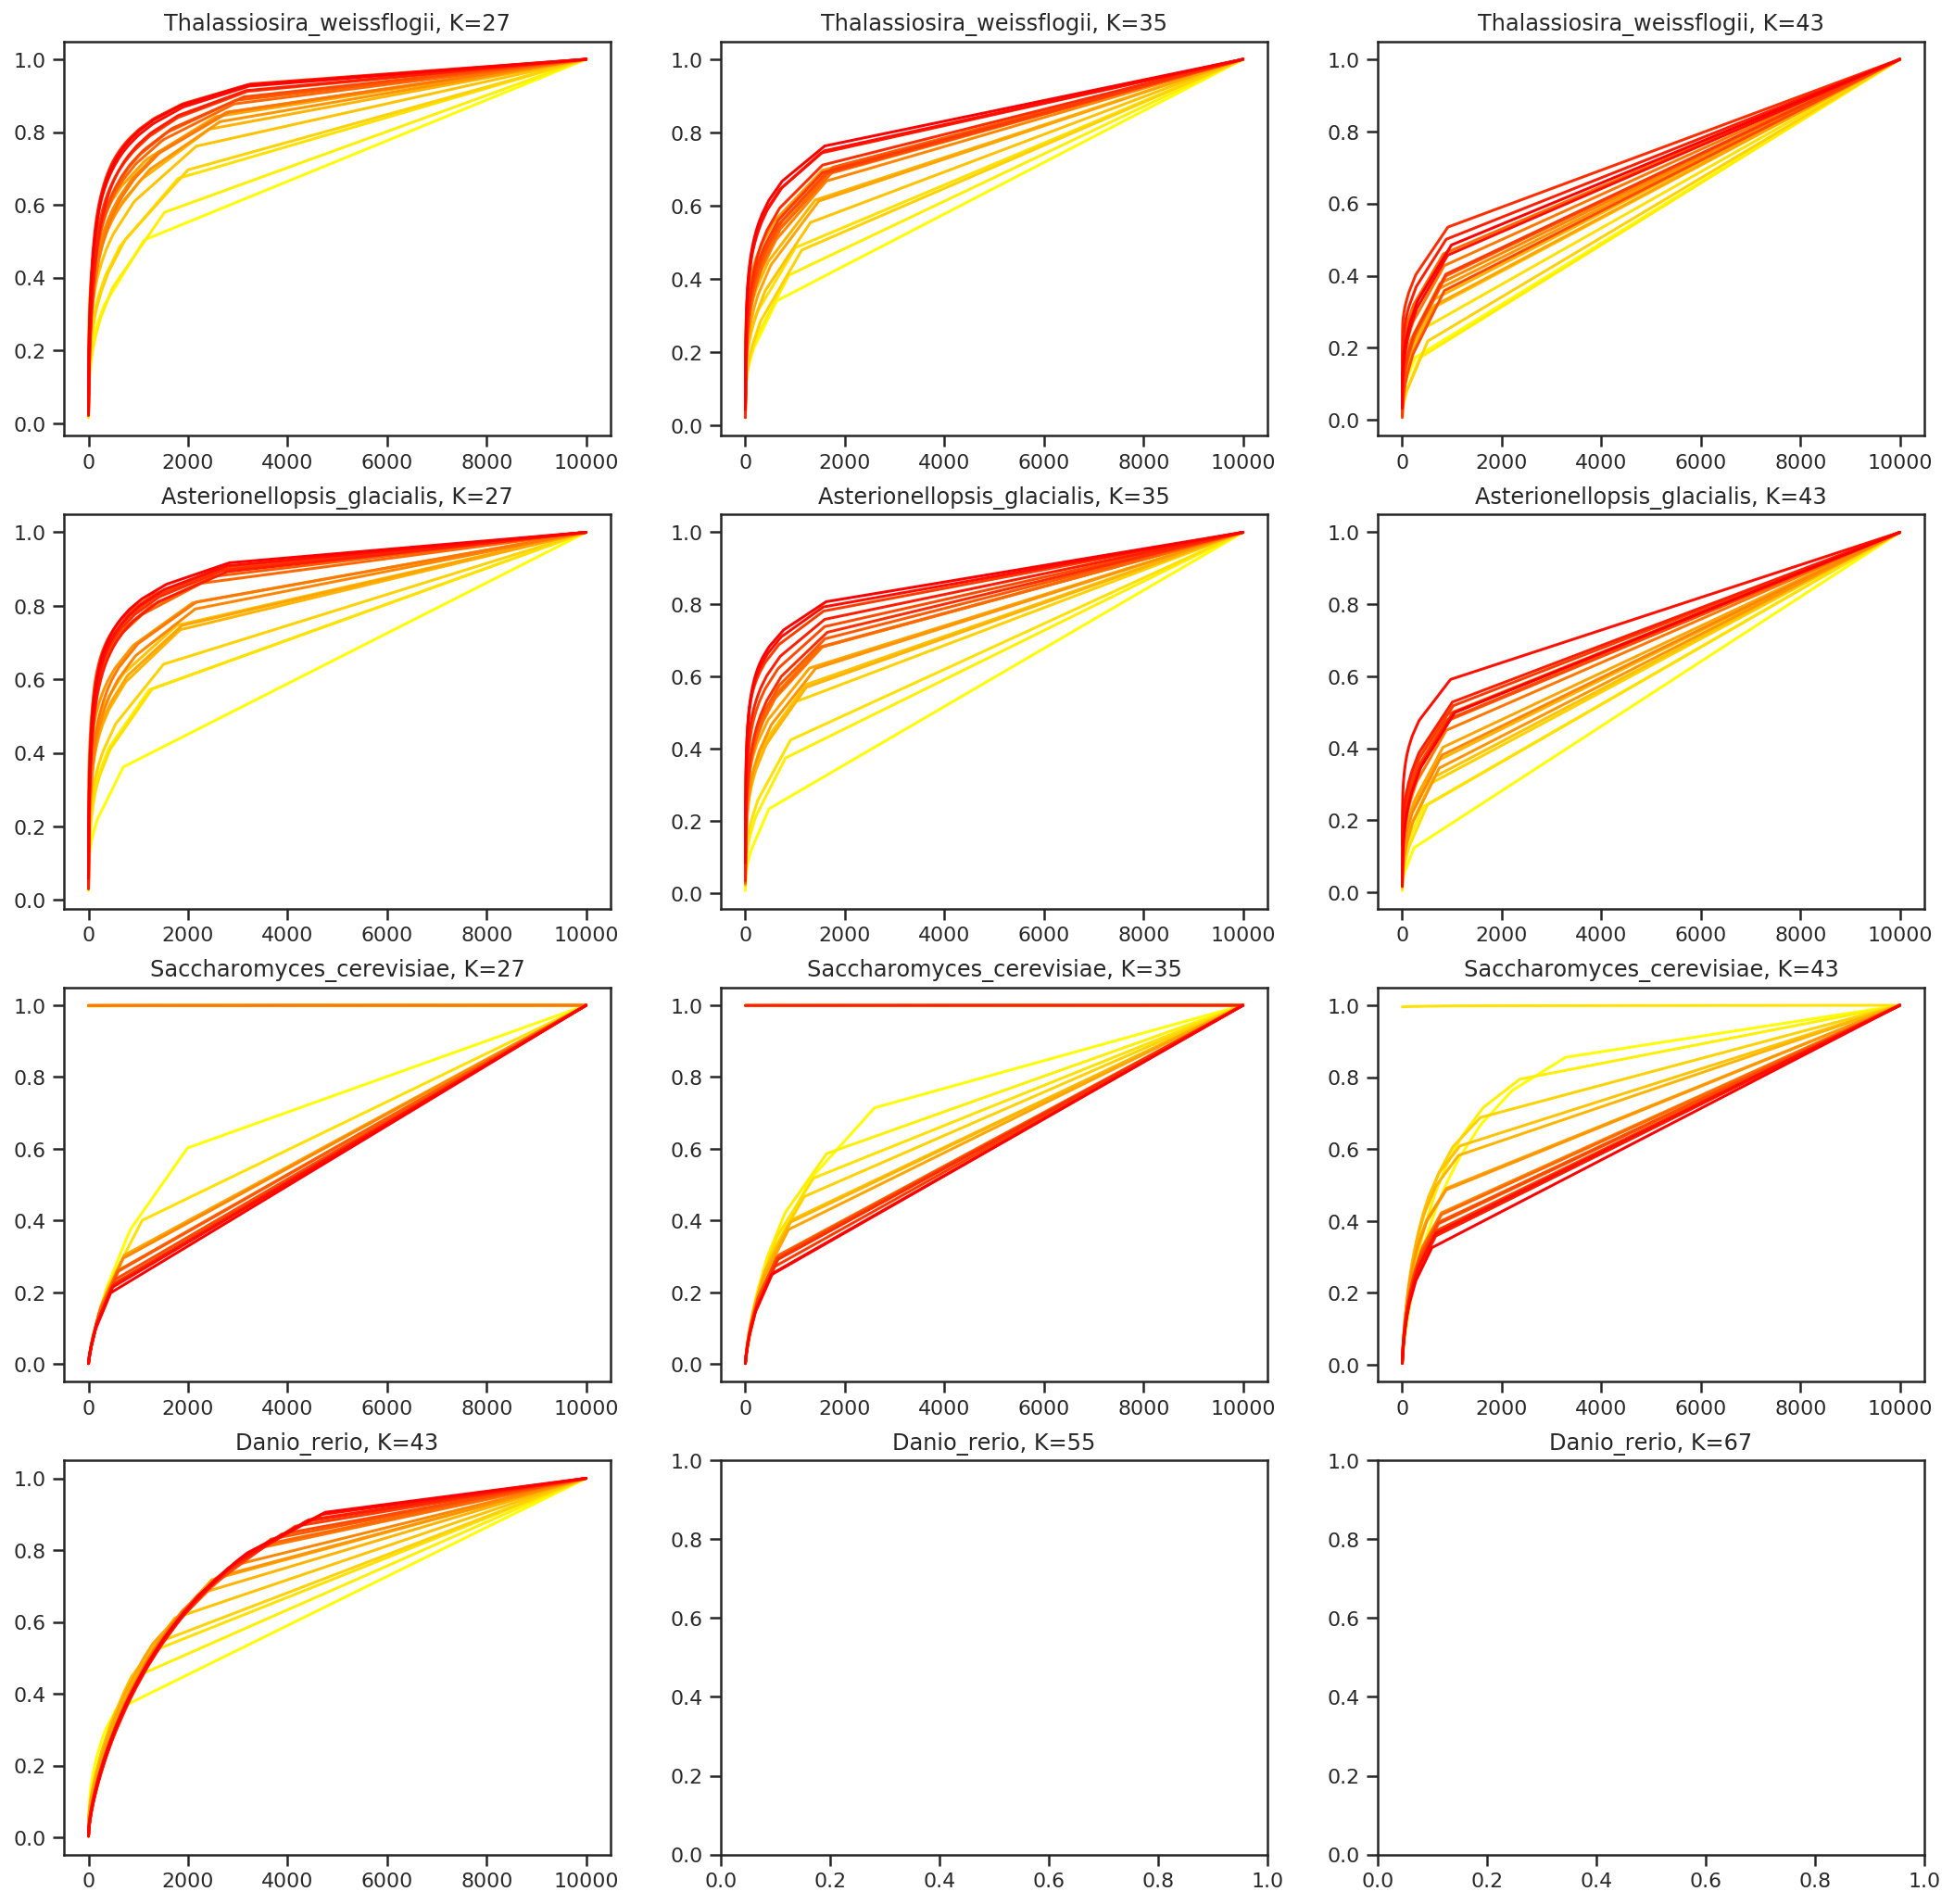

In [76]:
with FigureManager(figsize=(18,18), show=True, nrows=len(info['samples']), ncols=3) as (fig, ax):
    for n, sample_name in enumerate(info['samples']):
        for m, ksize in enumerate(info['samples'][sample_name]['ksizes']):
            directory  = os.path.join('outputs', sample_name, 'component_sampling', str(ksize))
            stats_file = os.path.join(directory, 'boink.cdbg.components.csv')
            name       = '{0}, K={1}'.format(' '.join(sample_name.split('_')), ksize)

            try:
                samples = plot_component_size_samples(stats_file, ax=ax[n][m], interval=None)
            except:
                print('Compute not finished yet or Error.')
            ax[n][m].set_title('{0}, K={1}'.format(sample_name, ksize))

In [103]:
samples.apply(lambda x: x.sort_values(ascending=False).values)

,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000,...,160000000,170000000,180000000,190000000,200000000,210000000,220000000,230000000,240000000,250000000
0,196,75,233,170,199,114,62,173,249,258,...,147,217,261,93,154,161,229,149,143,152
1,165,73,120,75,149,65,61,89,160,237,...,109,153,78,86,129,70,134,119,126,144
2,147,62,117,72,92,57,54,69,156,176,...,90,101,68,65,128,67,129,111,79,137
3,110,58,91,70,87,57,53,54,155,131,...,81,91,62,63,93,59,117,91,72,90
4,100,57,82,58,76,52,45,50,79,93,...,70,89,57,62,91,56,108,69,55,85
5,79,47,71,57,65,50,43,37,73,90,...,68,59,40,40,77,48,92,55,47,73
6,71,45,70,53,64,49,41,36,70,84,...,60,53,38,38,69,47,92,52,47,67
7,59,45,62,50,59,49,36,35,62,69,...,57,40,37,37,63,47,76,45,44,62
8,52,44,62,49,58,45,36,35,61,59,...,56,39,34,35,58,46,74,43,40,57
9,45,39,59,47,55,45,36,35,60,56,...,54,39,34,35,49,44,65,40,38,55


In [77]:
import glob
import re
from collections import OrderedDict

In [78]:
hu_dirs = glob.glob('outputs/Hu_metagenome/hu-genome*/')
id_pattern = re.compile(r'\D*?(\d\d)\/')
hu_samples = OrderedDict({int(id_pattern.match(hu_dir).group(1)): hu_dir for hu_dir in hu_dirs})
hu_samples = OrderedDict(sorted(hu_samples.items(), key = lambda x: x[0]))

/home/camille/miniconda/envs/libboink/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


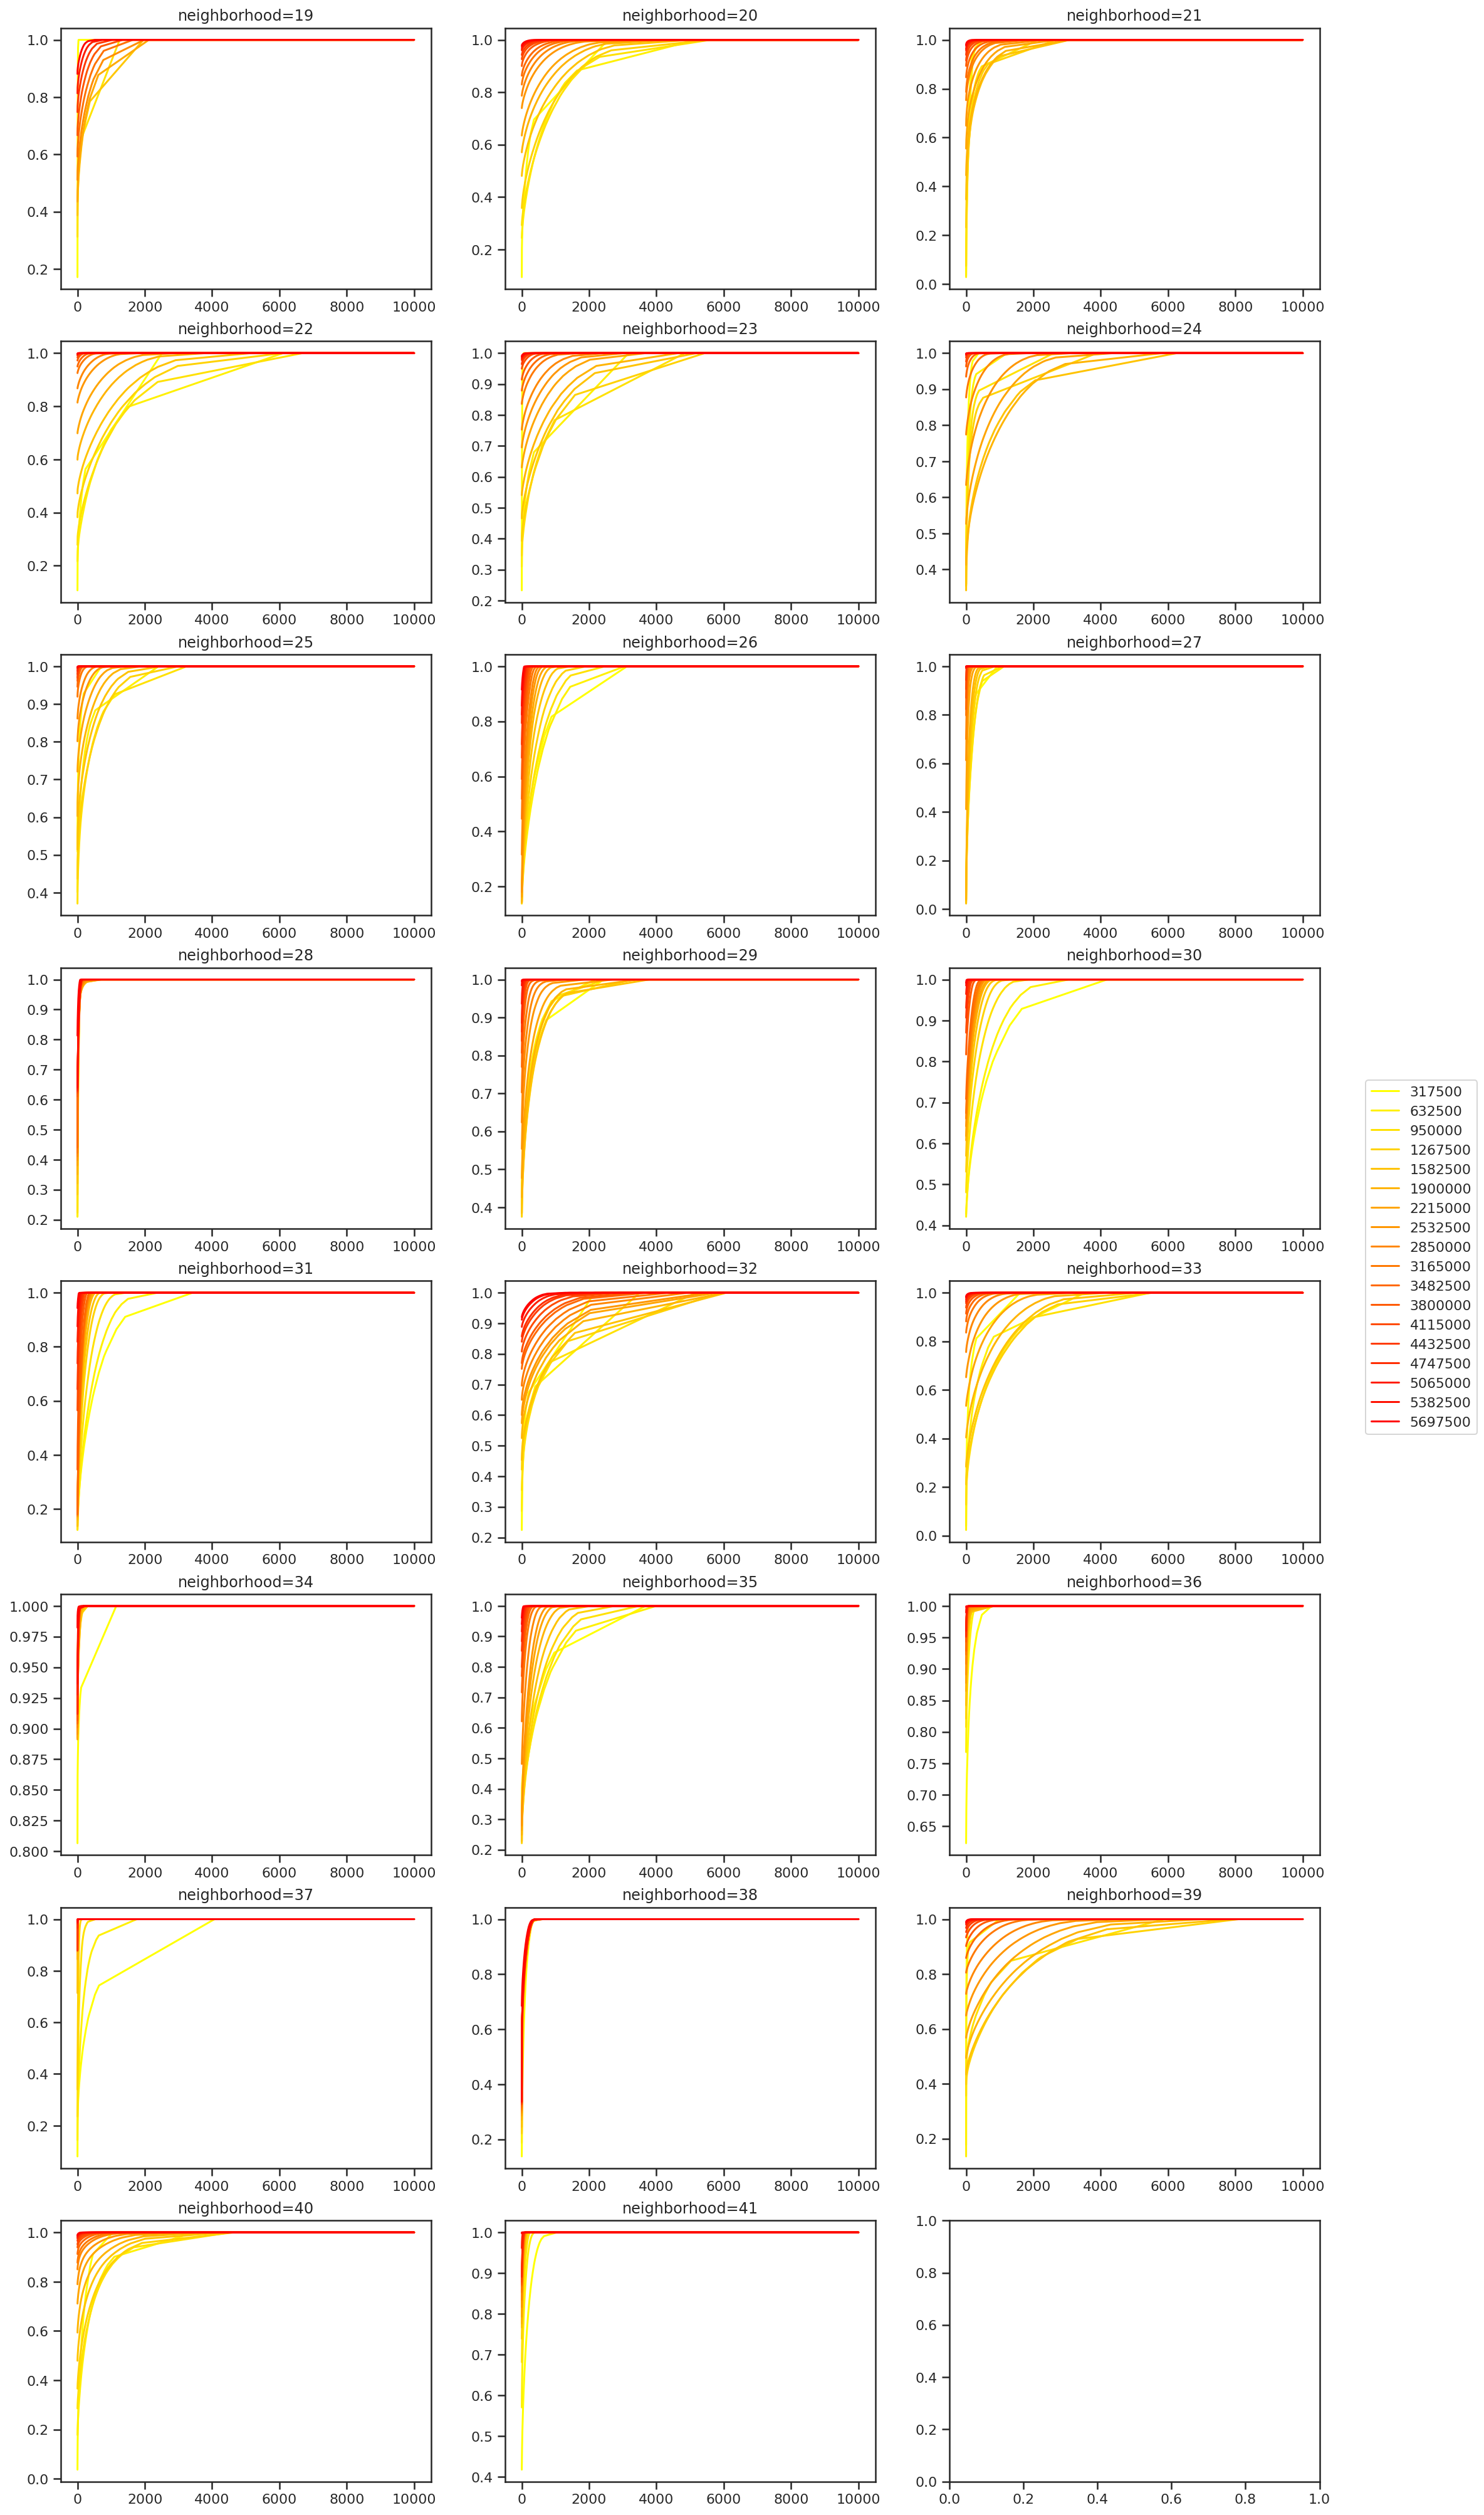

In [79]:
ncols, nrows = 3, 8
with FigureManager(figsize=(18,36), show=True, nrows=nrows, ncols=ncols) as (fig, ax):
    for i, (neighborhood, hu_dir) in enumerate(hu_samples.items()):
        row        = i // ncols
        col        = i % ncols
        stats_file = os.path.join(hu_dir, 'boink.cdbg.components.csv')
        title      = 'neighborhood={0}'.format(neighborhood)

        try:
            samples = plot_component_size_samples(stats_file, ax=ax[row][col], interval=None)
        except FileNotFoundError:
            print('Compute not finished yet.')
            
        ax[row][col].set_title(title)
        
    handles, labels = ax[row][col].get_legend_handles_labels()
    fig.legend(handles, labels, loc='right')

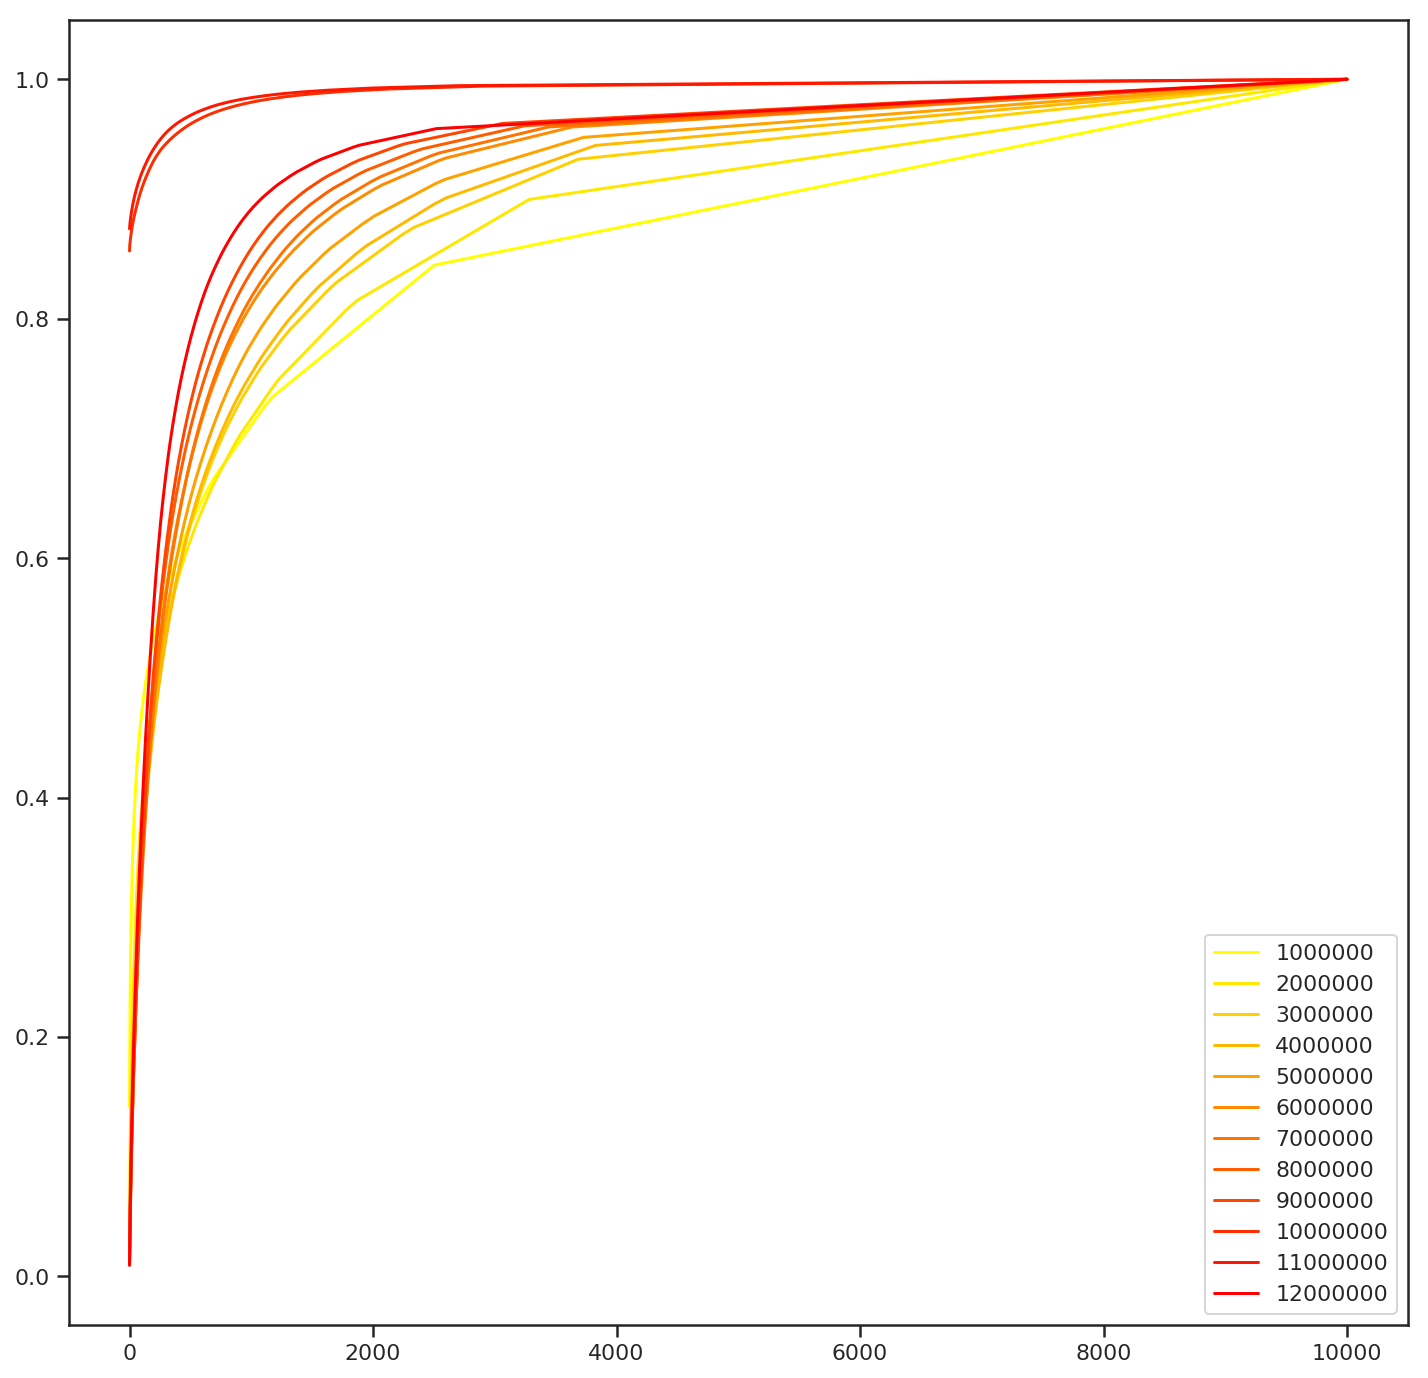

<Figure size 432x288 with 0 Axes>

In [105]:
stats_file = 'outputs/Saccharomyces_cerevisiae/boink_normalized_cdbg_stats/35/boink.cdbg.components.csv'
name = 'Sac pom'

try:
    samples, (fig, ax) = plot_component_size_samples(stats_file, interval=False, legend=True, logy=False)
except FileNotFoundError:
    print('Compute not finished yet.')

savefig('outputs/Saccharomyces_cerevisiae/boink_normalized_cdbg_stats/35/boink.cdbg.components.png')

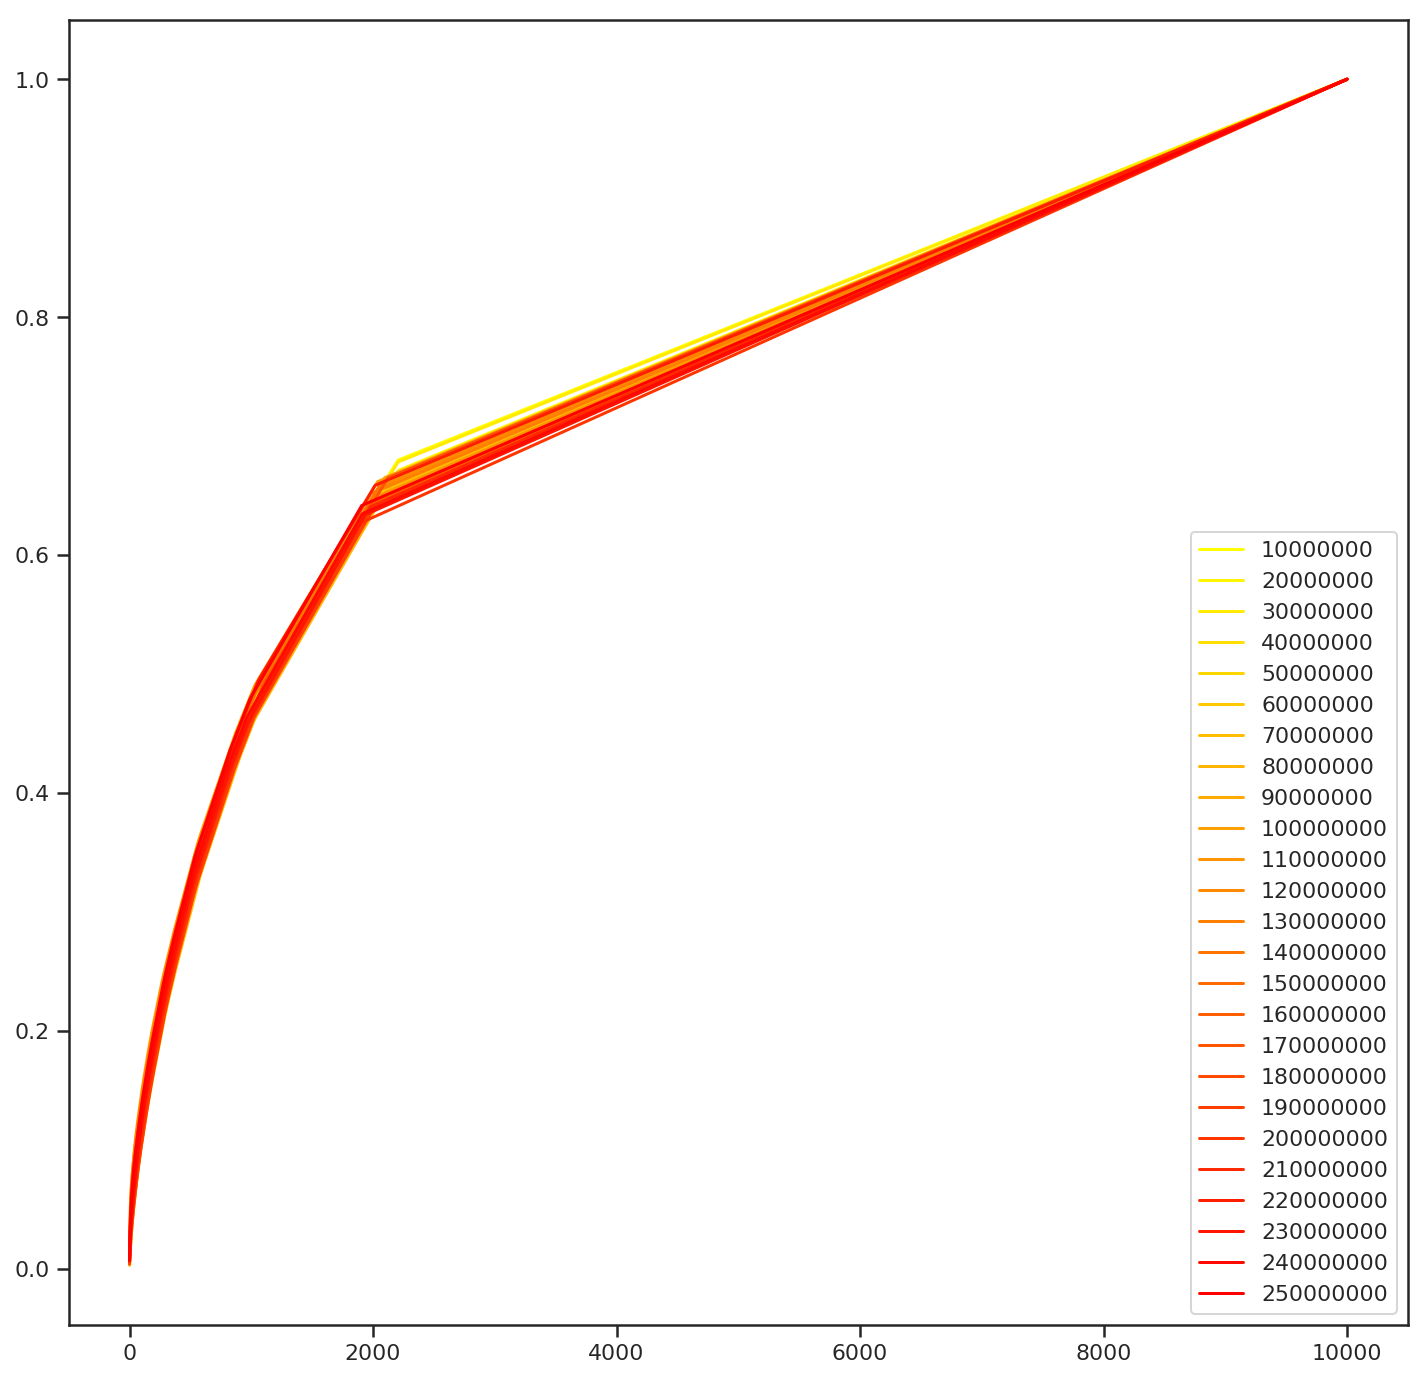

In [99]:
stats_file = 'outputs/Danio_rerio/component_sampling/43/boink.cdbg.components.csv'
name = 'zebrafish'

try:
    samples, (fig, ax) = plot_component_size_samples(stats_file, interval=False, legend=True, logy=False)
except FileNotFoundError:
    print('Compute not finished yet.')